# Stock Realized Volatility Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD'

In [3]:
df = yf.download("AMD", start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
def realized_volatility(df):
    rv = np.sqrt(np.sum(df**2))
    return rv

Text(0, 0.5, 'Realized Volatility')

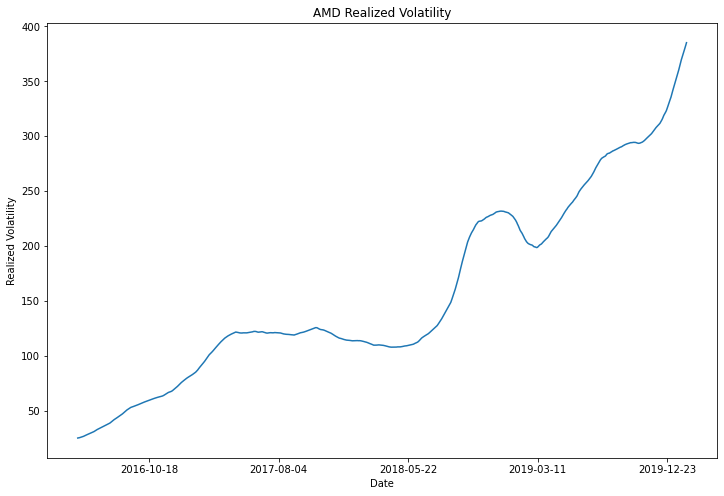

In [5]:
# Compute the running Tail ratio
running = [realized_volatility(df[i-90:i]) for i in range(90, len(df))]

# Plot running Tail ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(df)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')

In [6]:
realized_volatility(df)

830.1847493471693